In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP1 - 1er cuatri 2021
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **densidad-alta**: Son instancias con n = 1..200 y con densidad alta, es decir, los números de S son altos en comparación con W.
2. **densidad-baja**: Son instancias con n = 1..200 y con densidad baja, o sea, se necesitan muchos números de S para sumar W.
3. **mejor-caso-BT**: Instancias de mejor caso para el algoritmo de BT con podas.
4. **peor-caso-BT**: Instancias de peor caos para el algoritmo de BT con podas.
5. **dinamica**: Instancias con n y w variando para probar el algoritmo de PD.

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **FB**: Fuerza Bruta.
- **BT**: Backtracking con podas por optimalidad y factibilidad.
- **BT-F**: Backtracking solamente con poda por factibilidad.
- **BT-B**: Backtracking solamente con poda por optimalidad.
- **PD**: Programación dinámica.

# Experimentos
Leemos el dataframe con todos los resultados.

In [104]:
df_resultados = pd.read_csv("resultados/resultado.csv");
df_resultados

,dataset,n,R,metodo,tiempo
0,fb2,5,1,FB,0.002025
1,fb2,5,6,FB,0.001162
2,fb2,5,11,FB,0.001282
3,fb2,5,16,FB,0.001511
4,fb2,5,21,FB,0.001092
...,...,...,...,...,...
1551,muchas-soluciones-validas,37,1000,BT,91.701400
1552,muchas-soluciones-validas,38,1000,PD,0.269607
1553,muchas-soluciones-validas,38,1000,BT,864.789000
1554,muchas-soluciones-validas,39,1000,PD,0.285440


# Complejidad Fuerza Bruta

## Muchas soluciones

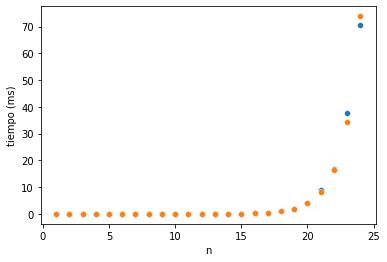

In [10]:
df_FBMS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"] == "muchas-soluciones-validas")].copy();

df_FBMS["tiempo_esperado"] = 2.0**(df_FBMS["n"]) * 0.000005; # exponencial

fig = sns.scatterplot(data=df_FBMS, x='n', y='tiempo');
#fig = sns.lineplot(data=df_FBMS , x='n', y='tiempo_esperado', color="orange");

#fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');

df_FBPS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();

df_FBPS["tiempo_esperado"] = 2.0**(df_FBPS["n"]) * 0.000005; # exponencial

fig = sns.scatterplot(data=df_FBPS, x='n', y='tiempo');
#fig = sns.lineplot(data=df_FBPS , x='n', y='tiempo_esperado', color="orange");

#fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

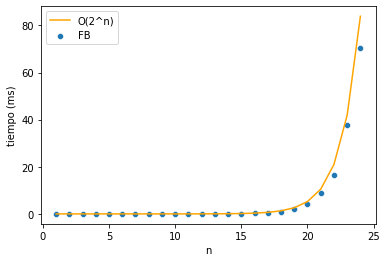

In [4]:
df_FBMS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"] == "muchas-soluciones-validas")].copy();

df_FBMS["tiempo_esperado"] = 2.0**(df_FBMS["n"]) * 0.000005; # exponencial

fig = sns.scatterplot(data=df_FBMS, x='n', y='tiempo');
fig = sns.lineplot(data=df_FBMS , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');


#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.9994734359056915


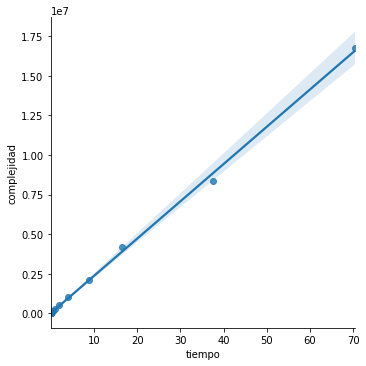

In [7]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_FBMS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="muchas-soluciones-validas")].copy();
df_FBMS["complejidad"] = 2.0 ** df_FBMS["n"];
fig = sns.lmplot(data=df_FBMS, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_FBMS, "tiempo", "complejidad"));

## Pocas soluciones

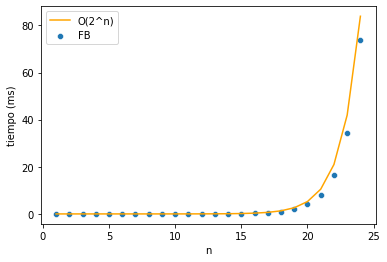

In [5]:
df_FBPS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();

df_FBPS["tiempo_esperado"] = 2.0**(df_FBPS["n"]) * 0.000005; # exponencial

fig = sns.scatterplot(data=df_FBPS, x='n', y='tiempo');
fig = sns.lineplot(data=df_FBPS , x='n', y='tiempo_esperado', color="orange");

fig.legend(labels=['O(2^n)','FB']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.9992984395642037


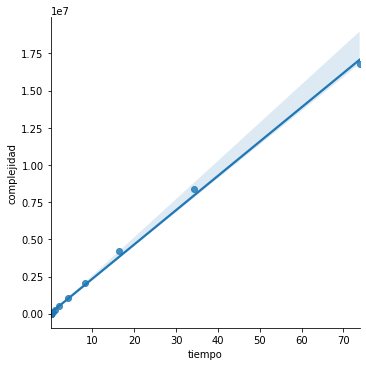

In [6]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_FBPS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="pocas-soluciones-validas")].copy();
df_FBPS["complejidad"] = 2.0 ** df_FBPS["n"];
fig = sns.lmplot(data=df_FBPS, x="tiempo", y="complejidad");
#plt.savefig("graficos/fb-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_FBPS, "tiempo", "complejidad"));

# Fuerza Bruta : Variable R

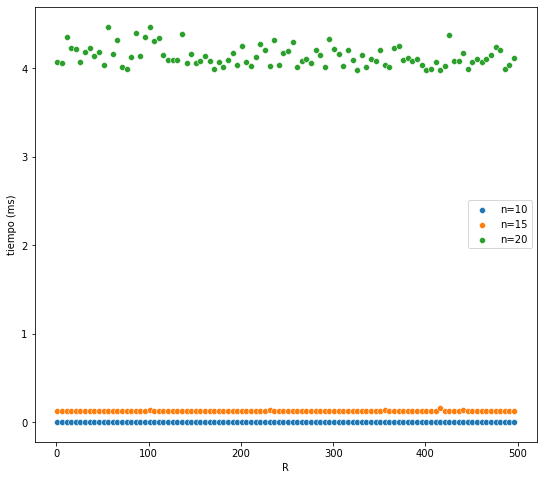

In [11]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
df_fb2= df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"]=="fb2")].copy();
fig, ax = plt.subplots(figsize=(9,8)) 
fig = sns.scatterplot(data=df_fb2[df_fb2["n"]==10], x='R', y='tiempo');
fig = sns.scatterplot(data=df_fb2[df_fb2["n"]==15], x='R', y='tiempo');
fig = sns.scatterplot(data=df_fb2[df_fb2["n"]==20], x='R', y='tiempo');
fig.legend(labels=['n=10','n=15','n=20']);
fig.set(xlabel='R', ylabel='tiempo (ms)');
#plt.savefig("graficos/dp-W.svg");

# Complejidad de Backtracking 

## Experimento Pocas/Muchas Soluciones validas

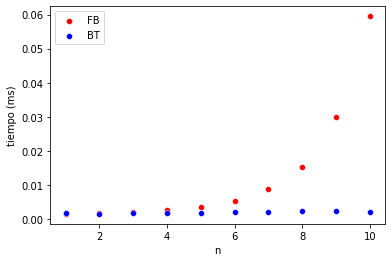

In [41]:
## Muchas soluciones

df_FBMS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"] == "muchas-soluciones-validas")].copy();
df_BTMS = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "muchas-soluciones-validas")].copy();

hasta = 10

fig = sns.scatterplot(data=df_FBMS[df_FBMS["n"] <= hasta], x='n', y='tiempo', color='red');
fig = sns.scatterplot(data=df_BTMS[df_BTMS["n"] <= hasta], x='n', y='tiempo', color='blue');


fig.legend(labels=['FB','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

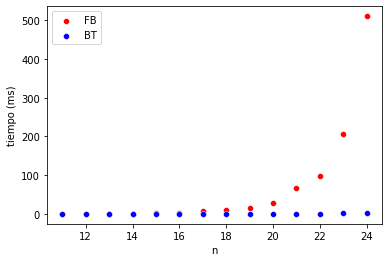

In [42]:
# para que funcione, primero correr grafico de arriba 

desde = hasta

fig = sns.scatterplot(data=df_FBMS[desde < df_FBMS["n"]], x='n', y='tiempo', color='red');
fig = sns.scatterplot(data=df_BTMS[desde < df_BTMS["n"]], x='n', y='tiempo', color='blue');


fig.legend(labels=['FB','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

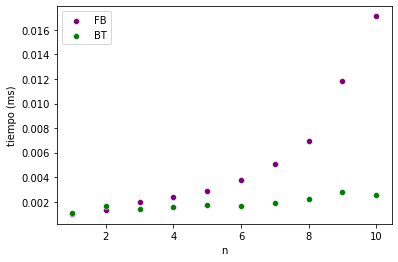

In [49]:
## Pocas soluciones

df_FBPS = df_resultados[(df_resultados["metodo"]=="FB") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();
df_BTPS = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();

hasta = 10

fig = sns.scatterplot(data=df_FBPS[df_FBPS["n"] <= hasta], x='n', y='tiempo', color='purple');
fig = sns.scatterplot(data=df_BTPS[df_BTPS["n"] <= hasta], x='n', y='tiempo', color='green');


fig.legend(labels=['FB','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

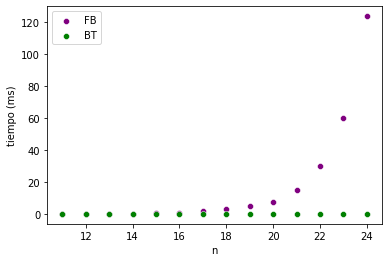

In [50]:
# para que funcione, primero correr grafico de arriba 

desde = hasta

fig = sns.scatterplot(data=df_FBPS[desde < df_FBPS["n"]], x='n', y='tiempo', color='purple');
fig = sns.scatterplot(data=df_BTPS[desde < df_BTPS["n"]], x='n', y='tiempo', color='green');


fig.legend(labels=['FB','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

## Experimento X: Todos Rompen
### Todos los productos rompen el tubo
En este experimento evaluamos el método BT con el dataset mejor-caso-bt-f, en el que la poda de factibilidad se activa en cada llamado recursivo. La hipótesis es que va a tener un comportamiento lineal para esta instancia.

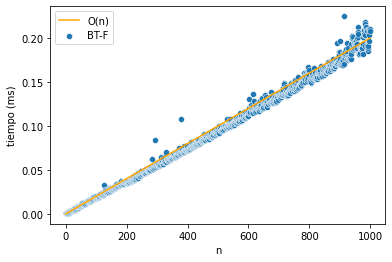

In [128]:
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT-F") & (df_resultados["dataset"] == "mejor-caso-bt-f")].copy();
df_BT_mejor_caso["tiempo_esperado"] = df_BT_mejor_caso["n"] * 0.0002; # Lineal
fig = sns.scatterplot(data=df_BT_mejor_caso, x='n', y='tiempo');
fig = sns.lineplot(data=df_BT_mejor_caso, x='n', y='tiempo_esperado', color="orange");
fig.legend(labels=['O(n)','BT-F']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.9963940345473824


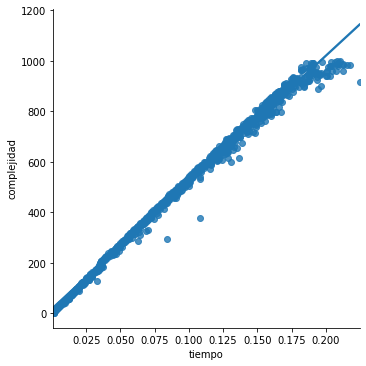

In [13]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_BT_mejor_caso = df_resultados[(df_resultados["metodo"]=="BT-F") & (df_resultados["dataset"] == "mejor-caso-bt-f")].copy();
df_BT_mejor_caso["complejidad"] = df_BT_mejor_caso["n"];
fig = sns.lmplot(data=df_BT_mejor_caso, x="tiempo", y="complejidad");
plt.savefig("graficos/bt-correlacion-mejor-caso.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_BT_mejor_caso, "tiempo", "complejidad"));

# Experimento: Complejidad de programación dinámica
En este experimento analizamos el tiempo de ejecución real del algoritmo de programación dinámica y lo comparamos con su cota teórica para ver si en la práctica se comporta de manera similar.

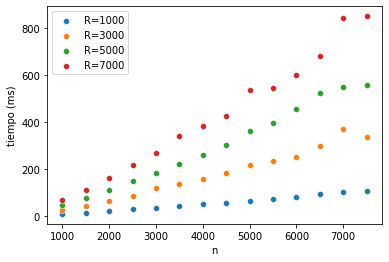

In [16]:
# Graficamos la evolución del tiempo de ejecución en función de n, con cortes en distintos W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==1000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==3000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==5000], x='n', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["R"]==7000], x='n', y='tiempo');
fig.legend(labels=['R=1000','R=3000','R=5000','R=7000']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/dp-n.svg");

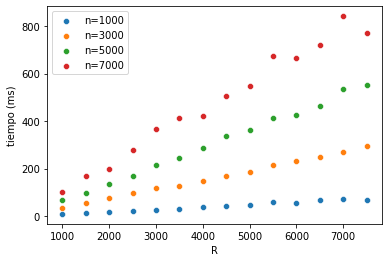

In [17]:
# Graficamos la evolución del tiempo de ejecución en función de W, con cortes en distintos n.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==1000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==3000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==5000], x='R', y='tiempo');
fig = sns.scatterplot(data=df_dinamica[df_dinamica["n"]==7000], x='R', y='tiempo');
fig.legend(labels=['n=1000','n=3000','n=5000','n=7000']);
fig.set(xlabel='R', ylabel='tiempo (ms)');
#plt.savefig("graficos/dp-W.svg");

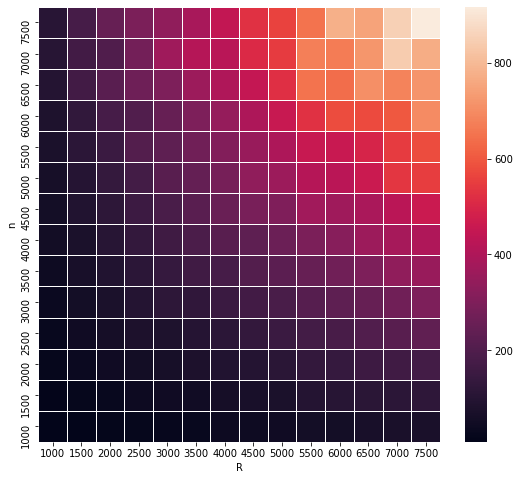

In [18]:
# Graficamos el tiempo de ejecución de las distintas instancias ordenadas por n y W.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
df_heatmap = df_dinamica.pivot_table(index='n', columns='R', values='tiempo', aggfunc=np.mean);

fig, ax = plt.subplots(figsize=(9,8)) 
fig = sns.heatmap(df_heatmap,linewidths=1);
fig.invert_yaxis();
#plt.savefig("graficos/dp-heatmap.svg");

Índice de correlación de Pearson: 0.9919635899916569


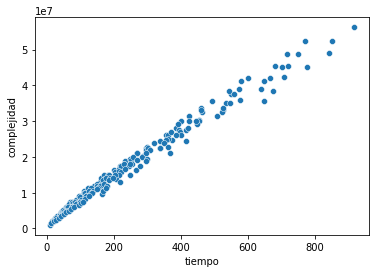

In [20]:
# Graficamos los tiempos de ejecución de la serie de instancias X1, ..., Xn vs la complejidad esperada.
df_dinamica = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"]=="dinamica")].copy();
df_dinamica["complejidad"] = df_dinamica["n"] * df_dinamica["R"];
fig = sns.scatterplot(data=df_dinamica, x="tiempo", y="complejidad");
plt.savefig("graficos/dp-correlacion.svg");
print("Índice de correlación de Pearson:", correlacion_pearson(df_dinamica, "tiempo", "complejidad"));

# Experimento Campana de Back-Tracking

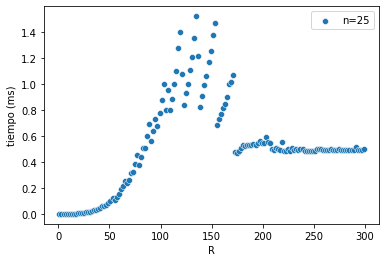

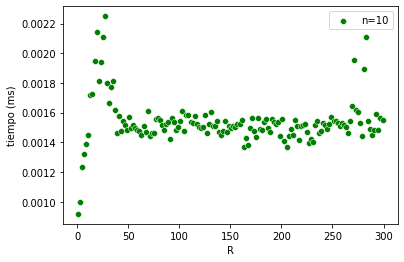

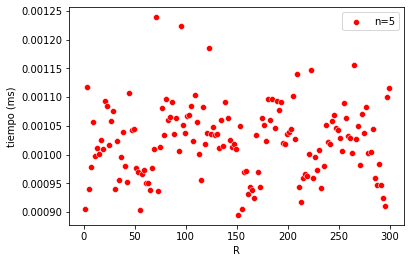

In [91]:
df_BT = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "bt")].copy();


fig, ax = plt.subplots(figsize=(7,7)) 
fig = sns.scatterplot(data=df_BT[df_BT["n"]==25], x='R', y='tiempo');
fig.set(xlabel='R', ylabel='tiempo (ms)');
fig.legend(labels=['n=25']);
plt.savefig("graficos/bt-campana-n25.svg");
plt.show()

fig = sns.scatterplot(data=df_BT[df_BT["n"]==10], x='R', y='tiempo',color = "green");
fig.set(xlabel='R', ylabel='tiempo (ms)');
fig.legend(labels=['n=10']);

plt.show()


fig = sns.scatterplot(data=df_BT[df_BT["n"]==5], x='R', y='tiempo',color = "red");
fig.set(xlabel='R', ylabel='tiempo (ms)');
fig.legend(labels=['n=5']);

plt.show()

In [78]:
#Tiempos de ejecucion ordenados de mayor a menor

df_BT.sort_values(by=['tiempo'],ascending = False )

,dataset,n,R,metodo,tiempo
6136,bt,30,189,BT,46.521700
6126,bt,30,169,BT,45.585100
6135,bt,30,187,BT,43.810700
6125,bt,30,167,BT,42.444900
6134,bt,30,185,BT,41.501100
...,...,...,...,...,...
1739,bt,1,95,BT,0.000821
1877,bt,2,71,BT,0.000820
1934,bt,2,185,BT,0.000814
1813,bt,1,243,BT,0.000814


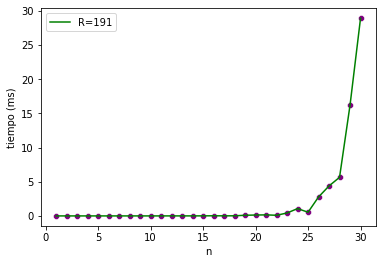

In [64]:
R = 191

df_BT = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "bt")].copy();

#df_BT["tiempo_esperado"] = ((df_BT["R"])**2) * 0.002; 

#fig = sns.lineplot(data=df_BT[df_BT["n"]==n][df_BT["R"]<180] , x='R', y='tiempo_esperado', color="orange");

fig = sns.scatterplot(data=df_BT[df_BT["R"] == R], x='n', y='tiempo',color = "purple");
fig = sns.lineplot(data=df_BT[df_BT["R"] == R], x='n', y='tiempo',color = "green");

fig.set(xlabel='n', ylabel='tiempo (ms)');
fig.legend(labels=[f'R={R}']);
plt.show()

In [65]:
tiemposmax = []
Rs_max = []

for n in df_BT["n"].unique().tolist():
    column = df_BT[df_BT["n"]==n]["tiempo"]

    max_value = column.max()
    tiemposmax.append(max_value)
    max_index = column.idxmax()
    max_r = df_BT["R"][max_index]
    Rs_max.append(max_r)
    

In [66]:
Rs_max

[111,
 289,
 37,
 237,
 71,
 157,
 15,
 19,
 19,
 27,
 35,
 273,
 43,
 47,
 43,
 55,
 65,
 79,
 81,
 77,
 89,
 103,
 103,
 141,
 135,
 161,
 157,
 135,
 159,
 189]

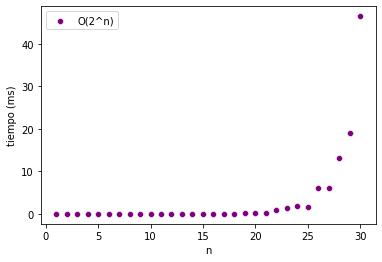

In [67]:
ejex = df_BT["n"].unique().tolist()


fig = sns.scatterplot(x= ejex, y=tiemposmax,color = "purple");

fig.legend(labels=['O(2^n)','BT peor caso']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

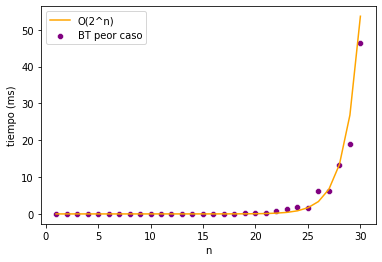

In [71]:
ejex = df_BT["n"].unique().tolist()

tiempo_esperado = [2.0**(i)* 0.00000005  for i in ejex]; # exponencial

fig = sns.scatterplot(x= ejex, y=tiemposmax,color = "purple");
fig = sns.lineplot( x=ejex, y=tiempo_esperado, color="orange");

fig.legend(labels=['O(2^n)','BT peor caso']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
plt.savefig("graficos/bt-complejidad-peor-caso.svg");

In [69]:
complejidad = [2.0**(i)  for i in ejex]; 

np.corrcoef(tiemposmax, complejidad)[0,1]

0.9937593441520464

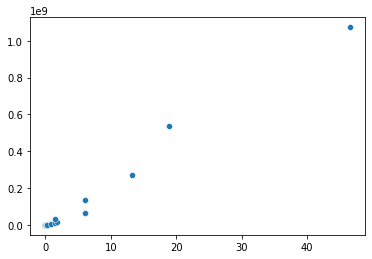

In [72]:
complejidad = [2.0**(i)  for i in ejex]; 

fig = sns.scatterplot(x=tiemposmax, y=complejidad);


# BackTrackin vs Programacion Dinamica

## Experimento 1

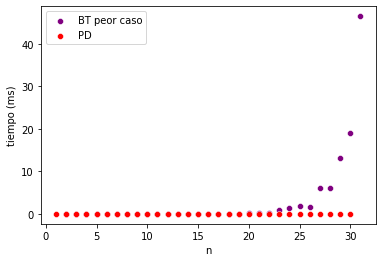

In [96]:
df_pd = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"] == "bt")].copy();
ejex = [n for n in range(2,32)]

fig = sns.scatterplot(x= ejex, y=tiemposmax,color = "purple");
fig = sns.scatterplot(data=df_pd, x='n', y='tiempo',color = "red");

fig.legend(labels=['BT peor caso','PD']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

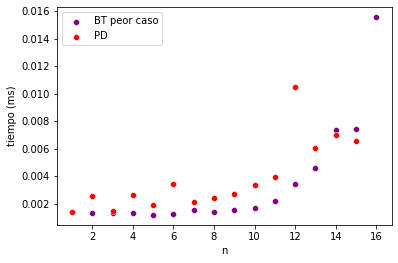

In [97]:
desde=  0
hasta = 15
df_pd = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"] == "bt")].copy();
ejex = [n for n in range(2,32)][desde:hasta]

fig = sns.scatterplot(x= ejex, y=tiemposmax[desde:hasta],color = "purple");
fig = sns.scatterplot(data=df_pd[df_pd["n"] <= hasta], x='n', y='tiempo',color = "red");

fig.legend(labels=['BT peor caso','PD']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

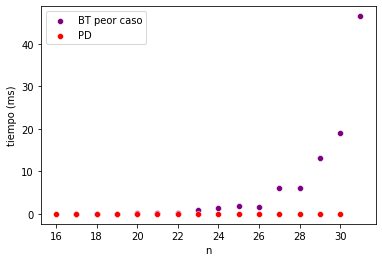

In [98]:
desde=  15
hasta = 31
df_pd = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"] == "bt")].copy();
ejex = [n for n in range(2,32)][desde:hasta]

fig = sns.scatterplot(x= ejex, y=tiemposmax[desde:hasta],color = "purple");
fig = sns.scatterplot(data=df_pd[desde < df_pd["n"] ], x='n', y='tiempo',color = "red");

fig.legend(labels=['BT peor caso','PD']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

## Experimento 2 :

## Pocas soluciones : bt vs pd

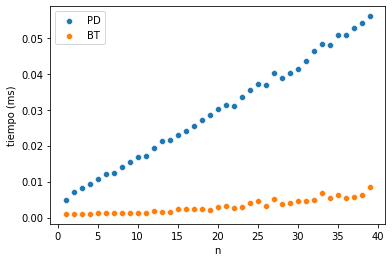

In [105]:
df_pd = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();
df_bt = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();

fig = sns.scatterplot(data=df_pd, x='n', y='tiempo');
fig = sns.scatterplot(data=df_bt, x='n', y='tiempo');

fig.legend(labels=['PD','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

## Muchas soluciones : bt vs pd

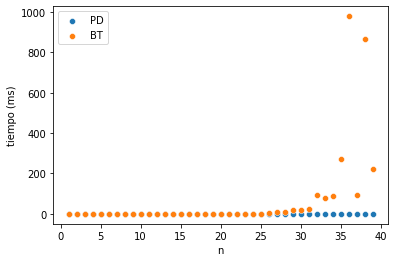

In [106]:
df_pd = df_resultados[(df_resultados["metodo"]=="PD") & (df_resultados["dataset"] == "muchas-soluciones-validas")].copy();
df_bt = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "muchas-soluciones-validas")].copy();

fig = sns.scatterplot(data=df_pd, x='n', y='tiempo');
fig = sns.scatterplot(data=df_bt, x='n', y='tiempo');

fig.legend(labels=['PD','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

### Pocas Soluciones para BackTracking

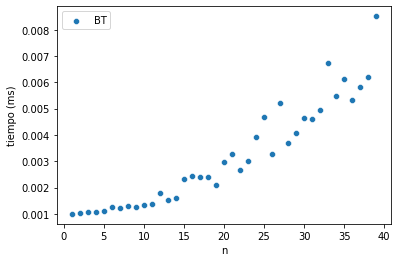

In [107]:
df_bt = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();

fig = sns.scatterplot(data=df_bt, x='n', y='tiempo');

fig.legend(labels=['BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

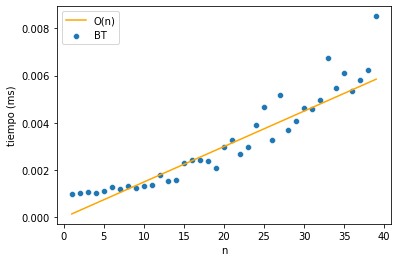

In [136]:
df_bt = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();

df_bt["tiempo_esperado"] = (df_bt["n"]) * 0.00015; # lineal

fig = sns.lineplot(data=df_bt , x='n', y='tiempo_esperado', color="orange");
fig = sns.scatterplot(data=df_bt, x='n', y='tiempo');

fig.legend(labels=['O(n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.9427822975900906


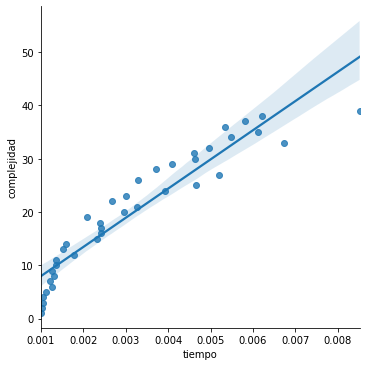

In [129]:
df_bt = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();
df_bt["complejidad"] = df_bt["n"];
fig = sns.lmplot(data=df_bt, x="tiempo", y="complejidad");

print("Índice de correlación de Pearson:", correlacion_pearson(df_bt, "tiempo", "complejidad"));

### Muchas Soluciones para BackTracking

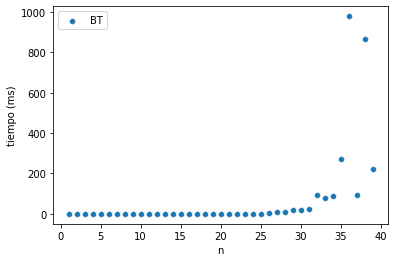

In [134]:
df_bt = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "muchas-soluciones-validas")].copy();

fig = sns.scatterplot(data=df_bt, x='n', y='tiempo');

fig.legend(labels=['BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

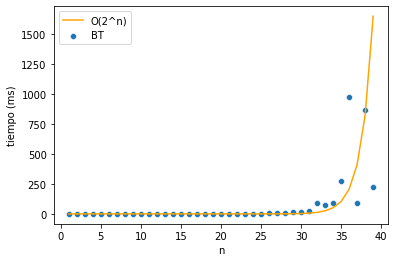

In [145]:
df_bt = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "muchas-soluciones-validas")].copy();

df_bt["tiempo_esperado"] = (2.0**(df_bt["n"])) * 0.000000003;  #exponencial

fig = sns.lineplot(data=df_bt , x='n', y='tiempo_esperado', color="orange");
fig = sns.scatterplot(data=df_bt, x='n', y='tiempo');

fig.legend(labels=['O(2^n)','BT']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");

Índice de correlación de Pearson: 0.4743636884883693


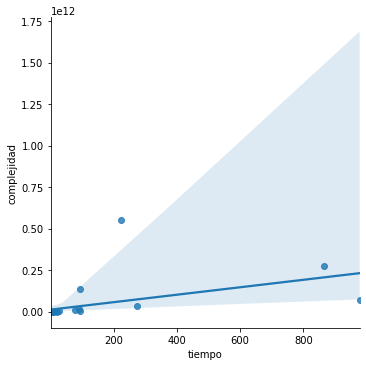

In [153]:
df_bt = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "muchas-soluciones-validas")].copy();

df_bt["complejidad"] = 2.0**(df_bt["n"]);
fig = sns.lmplot(data=df_bt, x="tiempo", y="complejidad");

print("Índice de correlación de Pearson:", correlacion_pearson(df_bt, "tiempo", "complejidad"));

### Pocas soluciones vs muchas soluciones BT

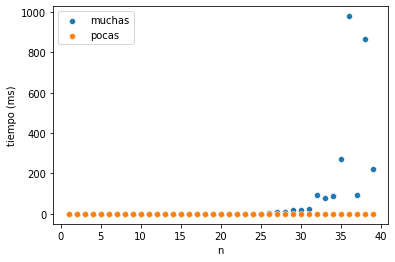

In [155]:
df_bt = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "muchas-soluciones-validas")].copy();

fig = sns.scatterplot(data=df_bt, x='n', y='tiempo');
df_bt = df_resultados[(df_resultados["metodo"]=="BT") & (df_resultados["dataset"] == "pocas-soluciones-validas")].copy();
fig = sns.scatterplot(data=df_bt, x='n', y='tiempo');

fig.legend(labels=['muchas','pocas']);
fig.set(xlabel='n', ylabel='tiempo (ms)');
#plt.savefig("graficos/bt-complejidad-mejor-caso.svg");